<a href="https://colab.research.google.com/github/chiyeon01/Hands_On_Machine_Learning/blob/main/4%EC%9E%A5.%20%EB%8B%A4%ED%95%AD%ED%9A%8C%EA%B7%80/%EB%8B%A4%ED%95%AD%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 핸즈온 머신러닝 4장. 모델훈련

### 다항회귀

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [114]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m,1)

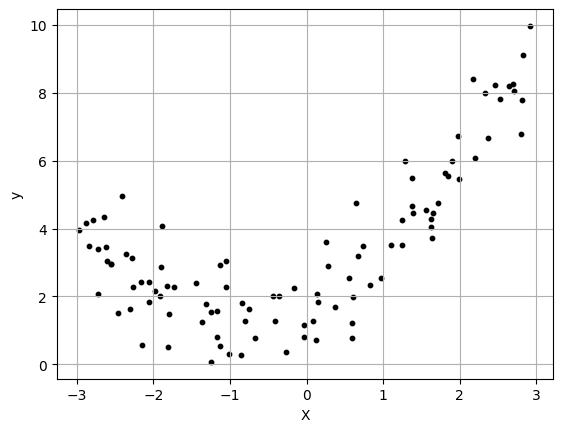

In [115]:
plt.scatter(X, y, color='#000000', s=10)
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)

In [116]:
from sklearn.preprocessing import PolynomialFeatures

# PolynomialFeatures를 이용하여 제곱 특성 값 생성
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [117]:
X[0]

array([-0.75275929])

In [118]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [119]:
from sklearn.linear_model import LinearRegression

# 실제 함수 : 0.5X^2 + X + 2 가우스_잡음
# 예측 함수 : 0.56X^2 + 0.93X + 1.78
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

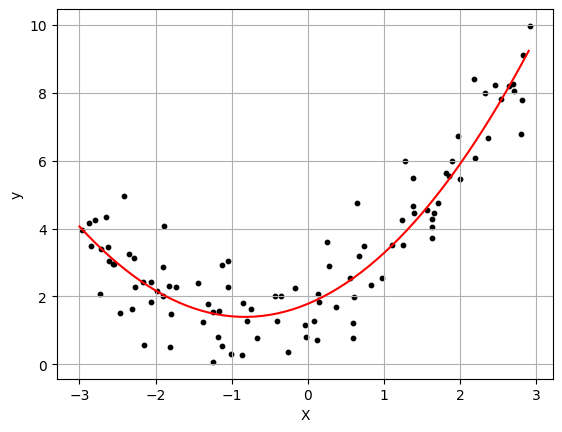

In [135]:
# 예측 함수 시각화
X_test = np.zeros((2, 60))
X_test[:][0] = np.arange(-30, 30) / 10.0
X_test[:][1] = X_test[0] ** 2
pred = lin_reg.predict(X_test.T)

plt.scatter(X, y, color='#000000', s=10)
plt.plot(X_test[:][0], pred.ravel(), 'r-')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)

### 과소/과대 적합 사례

In [192]:
# 아래처럼 과소/과대적합되는 사례를 없애기 위해 필요하다고 함.
poly_features1D = PolynomialFeatures(degree=1, include_bias=False)
poly_features2D = PolynomialFeatures(degree=2, include_bias=False)
poly_features30D = PolynomialFeatures(degree=30, include_bias=False)

X_poly_1D = poly_features1D.fit_transform(X)
X_poly_2D = poly_features2D.fit_transform(X)
X_poly_30D = poly_features30D.fit_transform(X)

In [193]:
lin_reg1D = LinearRegression()
lin_reg2D = LinearRegression()
lin_reg30D = LinearRegression()
lin_reg1D.fit(X_poly_1D, y)
lin_reg2D.fit(X_poly_2D, y)
lin_reg30D.fit(X_poly_30D, y)

LinearRegression()

(0.0, 10.0)

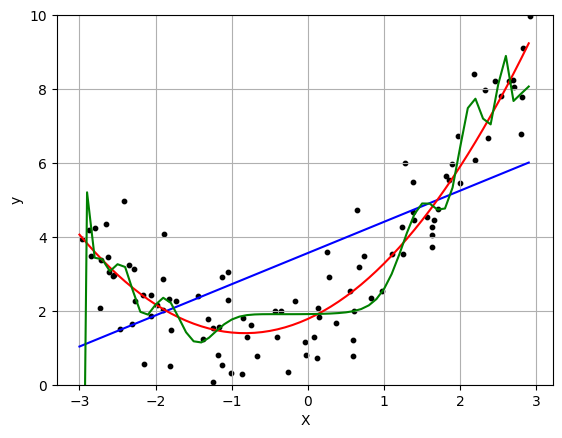

In [194]:
X_new = np.arange(-30, 30) / 10.0
pred_1D = lin_reg1D.predict(X_new.reshape(-1, 1))
pred_2D = lin_reg2D.predict(poly_features2D.fit_transform(X_new.reshape(-1, 1)))
pred_30D = lin_reg30D.predict(poly_features30D.fit_transform(X_new.reshape(-1, 1)))

plt.scatter(X, y, color='#000000', s=10)
plt.plot(X_new, pred_1D, 'b-')
plt.plot(X_new, pred_2D, 'r-')
plt.plot(X_new, pred_30D, 'g-')
plt.ylabel('y')
plt.xlabel('X')
plt.grid(True)
plt.ylim([0, 10])

In [199]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring='neg_root_mean_squared_error'
)

print(train_sizes)
print(train_scores.shape, val_scores.shape)

[ 1  2  4  6  8 10 12 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49 51 53 55 57 59 61 63 65 67 69 71 73 75 77 80]
(40, 5) (40, 5)


In [201]:
train_mean_scores = -1 * train_scores.mean(axis=1)
val_mean_scores = -1 * val_scores.mean(axis=1)

print(train_mean_scores.shape, val_mean_scores.shape)

(40,) (40,)


### 학습 곡선(과소/과대적합)
* 편향/분산 트레이드오프

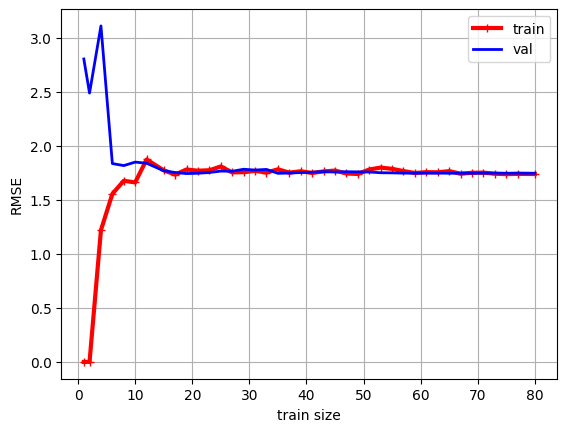

In [216]:
# 과소적합 예시
# 두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 매우 가까이 접근.

plt.plot(train_sizes, train_mean_scores, 'r-+', linewidth=3, label='train')
plt.plot(train_sizes, val_mean_scores, 'b-', linewidth=2, label='val')
plt.grid(True)
plt.xlabel('train size')
plt.ylabel('RMSE')
plt.legend()

(0.0, 3.0)

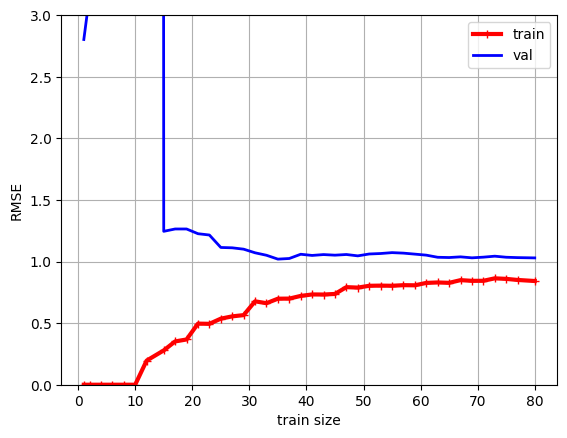

In [219]:
# 과대적합 예시
# 두 곡선 사이에 공간이 있음.
# 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워짐.

from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression()
)

train_sizes, train_scores, val_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring='neg_root_mean_squared_error'
)

train_mean_scores = -1 * train_scores.mean(axis=1)
val_mean_scores = -1 * val_scores.mean(axis=1)

plt.plot(train_sizes, train_mean_scores, 'r-+', linewidth=3, label='train')
plt.plot(train_sizes, val_mean_scores, 'b-', linewidth=2, label='val')
plt.grid(True)
plt.xlabel('train size')
plt.ylabel('RMSE')
plt.legend()
plt.ylim([0, 3])

In [ ]:
'''
일반적으로 모델의 복잡도가 커지면 분산이 늘고, 편향이 낮아짐.
반대의 상황도 같음.
이를 편향과 분산에 대][-0해 '트레이드오프'라고 부름.
'''

### Ridge

In [241]:
# l2규제라고도 불리는 릿지 회귀.
# 릿지는 모델의 가중치가 alpha값에 따라 작게 따라 유지되도록 함.
# alpha가 커지면 가중치도 작아짐.
# 선형 회귀임.
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver='cholesky')
ridge_reg.fit(X_poly_2D, y)
ridge_reg.predict([[1.5, 1.5**2]])

array([4.45168594])

(0.0, 10.0)

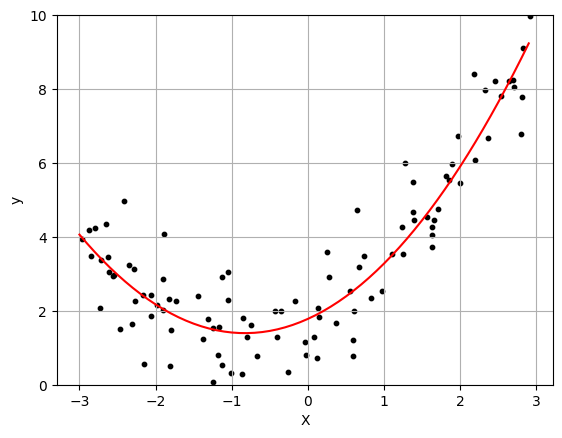

In [242]:
ridge_pred = ridge_reg.predict(poly_features2D.fit_transform(X_new.reshape(-1, 1)))
plt.scatter(X, y, color='#000000', s=10)
plt.plot(X_new, ridge_pred, 'r-')
plt.ylabel('y')
plt.xlabel('X')
plt.grid(True)
plt.ylim([0, 10])

### alpha가 커질수록 수평으로 변함.

### Lasso

In [251]:
# 라쏘 회귀는 덜 중요하다고 판단되는 가중치를 제거하려고 함.
# 가중치가 0
# alpha가 커질수록 희소 모델이 만들어짐.
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=1)
lasso_reg.fit(X_poly_2D, y)

Lasso(alpha=1)

(0.0, 10.0)

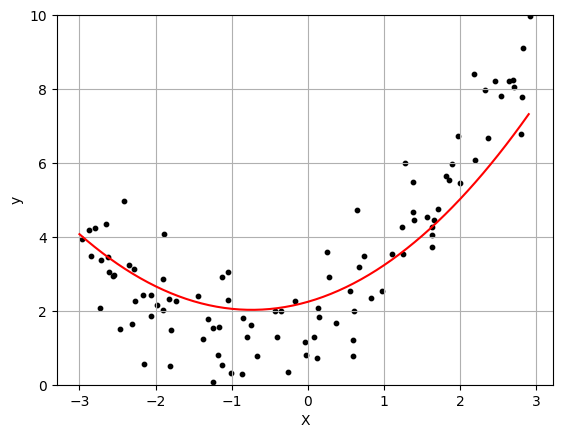

In [252]:
lasso_pred = lasso_reg.predict(poly_features2D.fit_transform(X_new.reshape(-1, 1)))
plt.scatter(X, y, color='#000000', s=10)
plt.plot(X_new, lasso_pred, 'r-')
plt.ylabel('y')
plt.xlabel('X')
plt.grid(True)
plt.ylim([0, 10])

### ElasticNet

In [253]:
# elastic은 l1, l2 규제를 모두 사용할 때 사용됨.
# l1_ratio가 1에 가까울 수록 l1규제(lasso)에 가까워짐. 반대도 동일
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_poly_2D, y)

(0.0, 10.0)

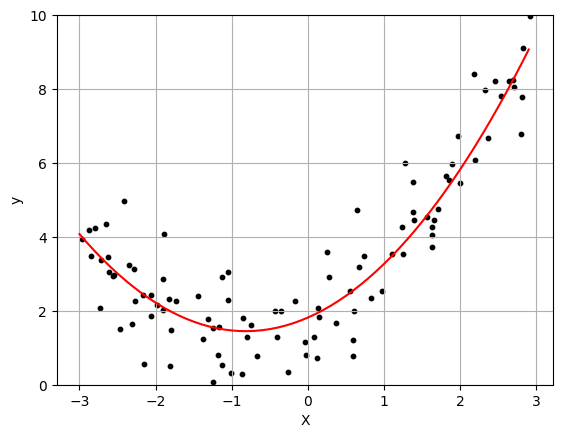

In [254]:
elastic_pred = elastic_net.predict(poly_features2D.fit_transform(X_new.reshape(-1, 1)))
plt.scatter(X, y, color='#000000', s=10)
plt.plot(X_new, elastic_pred, 'r-')
plt.ylabel('y')
plt.xlabel('X')
plt.grid(True)
plt.ylim([0, 10])